# Importing Packages and Reading Data


In [ ]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

key = 'ca7375d7f4790d1c423342ebd3dc18db7d50e71c'
df = pdr.get_data_tiingo('AAPL', api_key = key)
df.to_csv('AAPL.csv')

<ipython-input-79-95da32afb700>:11: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key = key)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM 

In [ ]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-04-30 00:00:00+00:00  165.26  167.26  161.84  162.13  42427424   
       2018-05-01 00:00:00+00:00  169.10  169.20  165.27  166.41  53569376   
       2018-05-02 00:00:00+00:00  176.57  177.75  173.80  175.23  66539371   
       2018-05-03 00:00:00+00:00  176.89  177.50  174.44  175.88  34068180   
       2018-05-04 00:00:00+00:00  183.83  184.25  178.17  178.25  56201317   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2018-04-30 00:00:00+00:00  39.382860  39.859477  38.567845  38.636955   
       2018-05-01 00:00:00+00:00  40.297965  40.321796  39.385244  39.656915   
       2018-05-02 00:00:00+00:00  42.078129  42.359333  41.418015  41.758796   
       2018-05-03 00:00:00+00:00  42.154388  42.299756  41.570532  41.913697   
       2018-05-04 00:00:00+00:00  43.808249  43.908339  42.459423  42.478488   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2018-04-30 00:00:00+00:00  169709696      0.0          1.0  
       2018-05-01 00:00:00+00:00  214277504      0.0          1.0  
       2018-05-02 00:00:00+00:00  266157484      0.0          1.0  
       2018-05-03 00:00:00+00:00  136272720      0.0          1.0  
       2018-05-04 00:00:00+00:00  224805268      0.0          1.0

In [ ]:
df.tail()

close      high     low     open    volume  \
symbol date                                                                     
AAPL   2023-04-21 00:00:00+00:00  165.02  166.4521  164.49  165.050  58337341   
       2023-04-24 00:00:00+00:00  165.33  165.6000  163.89  165.000  41949581   
       2023-04-25 00:00:00+00:00  163.77  166.3050  163.73  165.190  48714063   
       2023-04-26 00:00:00+00:00  163.76  165.2800  162.80  163.055  44105745   
       2023-04-27 00:00:00+00:00  168.41  168.5600  165.19  165.190  64902329   

                                  adjClose   adjHigh  adjLow  adjOpen  \
symbol date                                                             
AAPL   2023-04-21 00:00:00+00:00    165.02  166.4521  164.49  165.050   
       2023-04-24 00:00:00+00:00    165.33  165.6000  163.89  165.000   
       2023-04-25 00:00:00+00:00    163.77  166.3050  163.73  165.190   
       2023-04-26 00:00:00+00:00    163.76  165.2800  162.80  163.055   
       2023-04-27 00:00:00+00:00    168.41  168.5600  165.19  165.190   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2023-04-21 00:00:00+00:00   58337341      0.0          1.0  
       2023-04-24 00:00:00+00:00   41949581      0.0          1.0  
       2023-04-25 00:00:00+00:00   48714063      0.0          1.0  
       2023-04-26 00:00:00+00:00   44105745      0.0          1.0  
       2023-04-27 00:00:00+00:00   64902329      0.0          1.0

In [ ]:
df1 = df.reset_index()['close']
df1

0       165.26
1       169.10
2       176.57
3       176.89
4       183.83
         ...  
1253    165.02
1254    165.33
1255    163.77
1256    163.76
1257    168.41
Name: close, Length: 1258, dtype: float64

In [ ]:
df1.shape

(1258,)

Text(0.5, 1.0, 'Normalized Stock Prices')

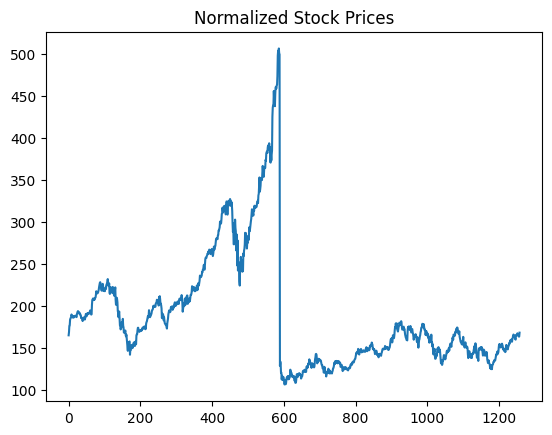

In [85]:
plt.plot(df1)
plt.title('Stock Prices')

# Preprocessing Data and Separating Training and Test Set

In [8]:
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
df1

array([[0.14632436],
       [0.15594239],
       [0.17465247],
       ...,
       [0.14259236],
       [0.14256731],
       [0.15421415]])

In [10]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data,test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [11]:
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [12]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [13]:
print(X_train.shape) , print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [14]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [15]:
print(X_train)

[[0.14632436 0.15594239 0.17465247 ... 0.27812148 0.27902317 0.27934878]
 [0.15594239 0.17465247 0.17545398 ... 0.27902317 0.27934878 0.28350657]
 [0.17465247 0.17545398 0.19283657 ... 0.27934878 0.28350657 0.27757044]
 ...
 [0.05247339 0.04578585 0.03812148 ... 0.08919224 0.09845961 0.09658109]
 [0.04578585 0.03812148 0.03328741 ... 0.09845961 0.09658109 0.10008766]
 [0.03812148 0.03328741 0.03651847 ... 0.09658109 0.10008766 0.10449593]]


In [16]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Creating a Stacked LSTM Model

In [17]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 418ms/step - loss: 0.0383 - val_loss: 0.0012
Epoch 2/100
12/12 [==============================] - 2s 206ms/step - loss: 0.0145 - val_loss: 0.0040
Epoch 3/100
12/12 [==============================] - 3s 219ms/step - loss: 0.0102 - val_loss: 0.0011
Epoch 4/100
12/12 [==============================] - 3s 211ms/step - loss: 0.0104 - val_loss: 0.0012
Epoch 5/100
12/12 [==============================] - 3s 224ms/step - loss: 0.0088 - val_loss: 8.0525e-04
Epoch 6/100
12/12 [==============================] - 4s 292ms/step - loss: 0.0078 - val_loss: 3.6964e-04
Epoch 7/100
12/12 [==============================] - 3s 212ms/step - loss: 0.0069 - val_loss: 4.6970e-04
Epoch 8/100
12/12 [==============================] - 2s 209ms/step - loss: 0.0069 - val_loss: 8.4110e-04
Epoch 9/100
12/12 [==============================] - 2s 209ms/step - loss: 0.0064 - val_loss: 0.0016
Epoch 10/100
12/12 [==============================] - 3s 284ms/step - loss

# Predicting Test Data and Plotting the Output

In [20]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 41ms/step


In [21]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [22]:
math.sqrt(mean_squared_error(y_train,train_predict))

217.86482588233545

In [23]:
math.sqrt(mean_squared_error(y_test,test_predict))

158.05458695809764

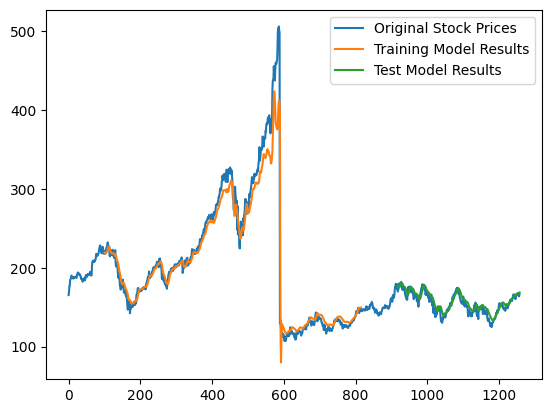

In [25]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[: , :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[: , :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Original Stock Prices', 'Training Model Results', 'Test Model Results'])
plt.show()

# Predicting the future 45 days data and Plotting the Output

In [72]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [73]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [74]:
lst_output=[]
n_steps=100
i=0
while(i<45):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)                            

[0.1521405]
101
1 day input [0.09966187 0.0903444  0.08541014 0.08969317 0.08846587 0.09430182
 0.09675642 0.0910958  0.07428929 0.06930495 0.0639449  0.06376957
 0.07165936 0.06359424 0.0626675  0.05808391 0.04809017 0.05703193
 0.05783344 0.04566061 0.04889167 0.04553538 0.05705698 0.05838447
 0.05983719 0.06675016 0.06654978 0.06993112 0.07288666 0.07105823
 0.07120852 0.07772073 0.08583594 0.08939261 0.08771446 0.09297433
 0.09790858 0.09056982 0.09380088 0.09665623 0.11015654 0.11937383
 0.11243582 0.11974953 0.11291171 0.11028178 0.11063244 0.11774577
 0.11611772 0.12145272 0.11739512 0.11448967 0.10429555 0.10537257
 0.10659987 0.09986224 0.10289292 0.10161553 0.09635567 0.09785848
 0.11068253 0.11769568 0.11211021 0.11529117 0.10958046 0.10434565
 0.1092799  0.11458986 0.11559173 0.12275517 0.12062617 0.12663745
 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158 0.12726362
 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731
 0.14482154 0.13823419 0.13515341 

In [75]:
day_new=np.arange(1,101)
day_pred=np.arange(101,146)

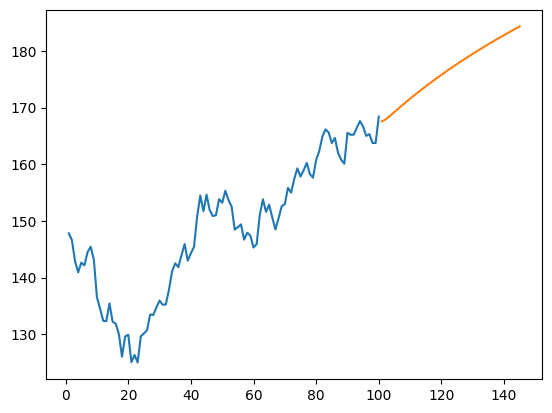

In [76]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

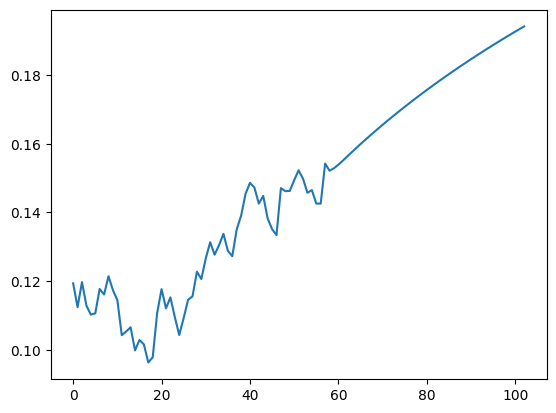

In [77]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

Text(0.5, 1.0, 'Stock Price Chart with Prediction')

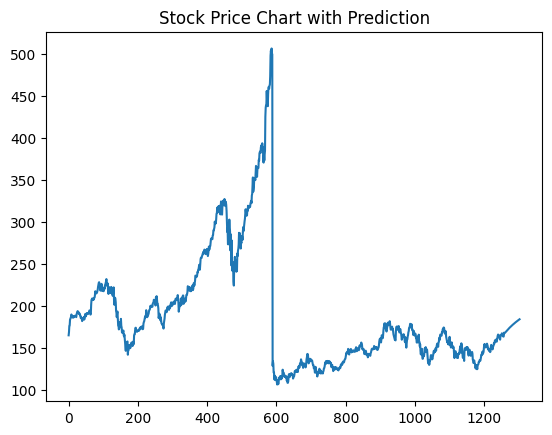

In [78]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)
plt.title("Stock Price Chart with Prediction")